<a href="https://colab.research.google.com/github/davidmuna/KNN-Naive-Bayes-Classifiers/blob/main/Core_Week_9_KNN_Classifier_David_Muna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - KNN Classifier

## 1. Defining the Question



### a) Specifying the Data Analytic Question

No question was posed, therefore, as a Data Scientist, my question would be to classify the titanic passengers as either survived or not.

### b) Defining the Metric for Success

Successfully classifying passengers as either survived or not with an accuracy of correct predictions not less than 80% using the following model and metrics:



*   K Neighbours Classifier 
*   K Neighbours Classifier Model Distance Metrics & Performance Tuning
*   Selecting the best test_size
*   Accuracy of correct predictions
*   Reporting confusion matrix

### c) Understanding the context 

The Titanic had differrent classes for its passengers. Based on the structure of the ship and the location of cabins for the different classes on the ship, some classes were predisposed to high chances of survival while others had a higher risk of death judging from the angle at which the titanic sunk.

### d) Recording the Experimental Design



*   Data Preparation and Cleaning
*   Feature Engineering
*   Exploratory Data Analysis
*   Modelling
*   Improving Model Performance
*   Evaluation




### e) Data Relevance

Our data becomes relevant once we achieve the metrics for success.

## 2. Reading the Data

In [42]:
# Loading the Data from the source i.e. csv
# ---
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Filtering Warnings
import warnings
warnings.simplefilter("ignore")

train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')



## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
print('train',train.shape)
print('test',test.shape)

train (891, 12)
test (418, 11)


In [6]:
# Previewing the top of our datasets
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
# Previewing the bottom of our datasets
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
test.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
# Checking whether each column has an appropriate datatype
print(train.dtypes)
print('########################')
print(test.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
########################
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

Max Fare 512.3292
Min Fare 0.0


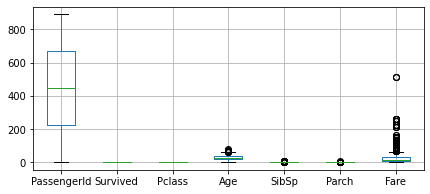

In [11]:
# Checking for Outliers
#Max and MIn fares
print('Max Fare',train['Fare'].max())
print('Min Fare',train['Fare'].min())
train.boxplot(figsize=(7,3))

Max Fare 512.3292
Min Fare 0.0


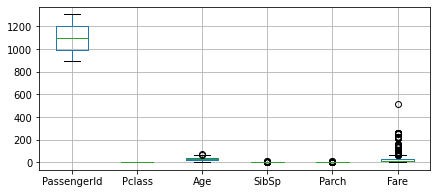

In [12]:
print('Max Fare',test['Fare'].max())
print('Min Fare',test['Fare'].min())
test.boxplot(figsize=(7,3))

Judging from the Min and Max fare, there seems to be no outliers or they are an imnportant part of the dataset.We retain them.

In [13]:
#Checking summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
# Checking for Anomalies
print(train.nunique())
print('#################')
print(test.nunique())

#Everything seems to be okay, no anomalies

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
#################
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [16]:
# Identifying the Missing Data
print(train.isnull().sum())
print('###############')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
###############
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
#Checking Duplicates
print('Duplicates', train.duplicated().sum())
train = train.drop_duplicates()
print('Duplicates', train.duplicated().sum())

Duplicates 0
Duplicates 0


##### Feature Engineering

In [18]:
#Extracting Title from Passengers' Names by creating a list containing train and test datasets
merged_list = [train,test]

#Creating a for loop that extracts Title from Name and overrides Name column.

for dataset in merged_list:
  dataset['Name'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [19]:
#Previewing Titles in Names
print(test.Name.value_counts())
print('#####################')
print(train.Name.value_counts())

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Name, dtype: int64
#####################
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Countess      1
Capt          1
Mme           1
Sir           1
Ms            1
Jonkheer      1
Lady          1
Name: Name, dtype: int64


In [20]:
#Extracting the First Letter from the Cabin column using a for loop on merged_list

for dataset in merged_list:
  dataset['Cabin'] = dataset['Cabin'].str[:1]

In [21]:
## converting categorical columns to numerical within the range of 0-1 to retain Nan values and 
#deal with them later

for dataset in merged_list:
  dataset['Cabin'] = dataset['Cabin'].map({'A':0,'B':0.1,'C':0.2,'D':0.3, 'E':0.4,'F':0.5,'G':0.6, 'T':0.7})

In [22]:
#Dealing with missing data

#Filling missing values of Age,Cabin and Fare(test dataset) with median values for respective passenger class
#age
train['Age'].fillna(train.groupby('Pclass')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Pclass')['Age'].transform('median'), inplace=True)

#Cabin
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

#Fare
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

#Checking missing records
print(test.shape)
print(test.info())
print('############################')
print(train.shape)
print(train.info())

(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 36.0+ KB
None
############################
(891, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 

In [23]:
#Dropping the two records in Embarked that have missing values in train dataset

train = train.dropna()

In [24]:
#Converting Categorical columns to numerical

cat_cols = ['Name', 'Sex','Embarked']

# Using a for loop to change columns to numerical

#train dataset
for column in train.columns:
    if column in cat_cols:
      train[column] = train[column].astype('category').cat.codes

#test dataset
for column in test.columns:
    if column in cat_cols:
      test[column] = test[column].astype('category').cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [25]:
#Dropping Columns we wont need
train = train.drop(columns=['PassengerId','Ticket'])
test = test.drop(columns=['PassengerId','Ticket'])

## 6. Exploratory Analysis

##### Bivariate Summaries

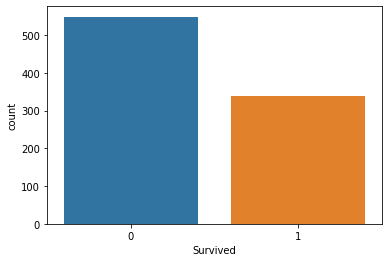

In [26]:
#Countplot for those that survived

ax = sns.countplot(x="Survived", data=train)

#We can see that a lot of people died. (0)

In [27]:
#Creating a bar chart function to plot survived/dead passengers based on the different columns

def bar_chart(column):
  #New dataframes for survived and dead passengers
  survived = train[train['Survived']==1][column].value_counts()
  dead = train[train['Survived']==0][column].value_counts()

  #merging suvived and dead dataframes
  outcome = pd.DataFrame([survived, dead])

  #Indexing the dataframe
  outcome.index = ['Survived', 'Dead']

  #Plotting Bar Chart
  outcome.plot(kind='bar', stacked = True)

Text(0.5, 1.0, 'Passenger Class Vs Survival')

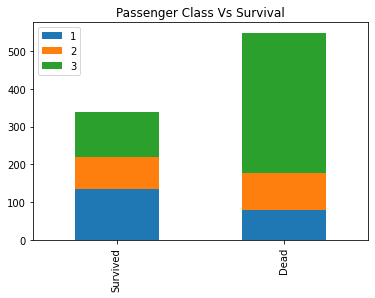

In [28]:
#Plotting survival against class by calling the bar_chart function and passing the column of interest in the argument
bar_chart('Pclass')
plt.title('Passenger Class Vs Survival')

The figure shows more people from 3rd class did not survive compared to other classes.

Text(0.5, 1.0, 'Sex Vs Survival')

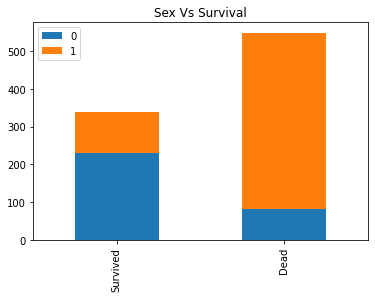

In [29]:
#Sex against Survival
bar_chart('Sex')
plt.title('Sex Vs Survival')

There were more female (0) survivors than males

Text(0.5, 1.0, 'SibSp Vs Survival')

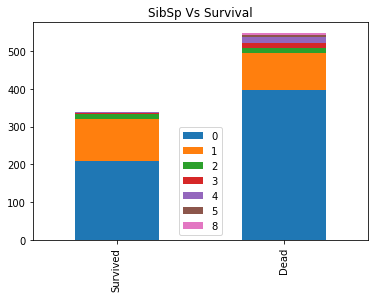

In [30]:
#SibSp against Survival
bar_chart('SibSp')
plt.title('SibSp Vs Survival')

Passengers that had more siblings or a spouse aboard the titanic increased their chances of survival compared to those who were alone.

Text(0.5, 1.0, 'Parch Vs Survival')

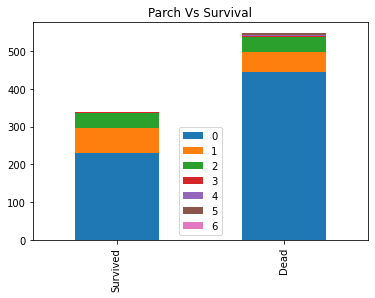

In [31]:
#Parch against Survival
bar_chart('Parch')
plt.title('Parch Vs Survival')

Passengers that had more parents or children aboard the titanic increased their chances of survival compared to those who were alone.

Text(0.5, 1.0, 'Embarked Vs Survival')

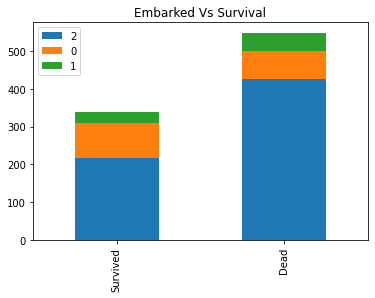

In [32]:
#Embarked against Survival
bar_chart('Embarked')
plt.title('Embarked Vs Survival')

Passengers who embarked at ports meant for a higher class aboard the titanic had a higher chance of survival. Port S was assocaiated with 3rd Class passengers, hence more deaths.

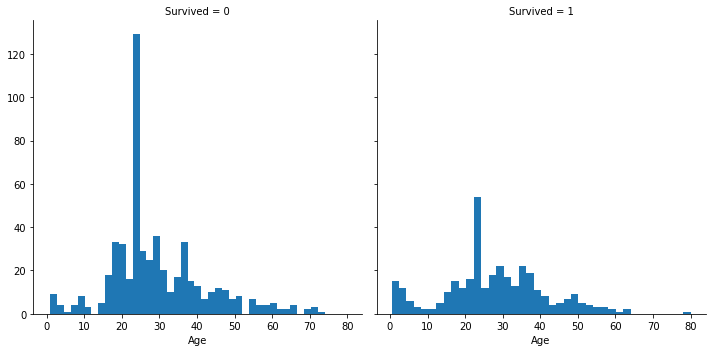

In [33]:
#Plotting a Facet Grid to show distribution of Ages and those that survived

facet = sns.FacetGrid(train, col='Survived', height=5)
facet.map(plt.hist, 'Age', bins=40)

The distribution shows that majority of people of an approximate age of 23-24 died(Survived = 0).These were young men judging from the previous bar_chart for Sex Vs Survival.

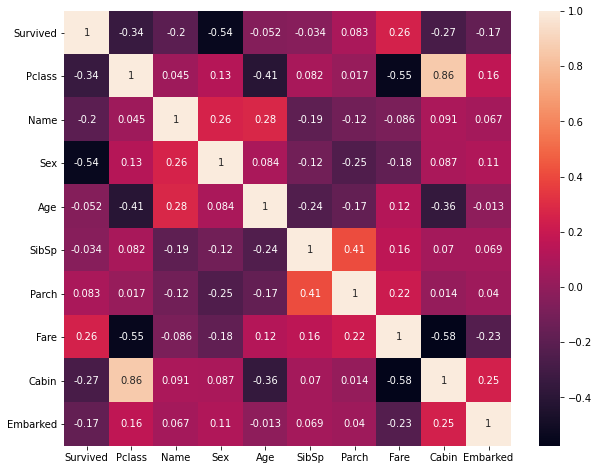

In [34]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
          xticklabels=train.columns.values,
          yticklabels=train.columns.values,
         annot = True)

Theres a strong correlation between sex and survived(-0.54).Indicating a particular sex was predisposed to a higher chance of survival.

## 7. Implementing the Solution

##### Baseline Model

In [35]:
#Splitting data into X and y
X = train.drop(columns = ['Survived'])
y = train['Survived']

from sklearn.model_selection import train_test_split

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 0)

In [36]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#Modelling using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

#setting our k in KNeighborsClassifier as 7
knn = KNeighborsClassifier(7)

#Prediction
y_pred = knn.fit(X_train, y_train).predict(X_test)

#Checking metrics and evaluation
print(np.mean(y_pred == y_test))  #percentage of correct classification
print(confusion_matrix(y_pred , y_test))
baseline_accuracy = np.mean(y_pred == y_test) #for comparisons in the next models

0.7640449438202247
[[88 25]
 [17 48]]


The confusion matrix tells us we have 88 True Positive Predictions and 48 True Negative predictions

##### Optimisation

Distance Metric and Hyperparameter Tuning






In [79]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 0)

#List of out hyperparameters and type of distance
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20))
p=[1,2] # 1 is manhattan distance and 2 is euclidean distance

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#creating second KNN object
knn_2 = KNeighborsClassifier()

#Conducting GridSearch with 10 folds
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fitting and prediction the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

#Returns 
#Best leaf_size: 5
#Best p: 1
#Best n_neighbors: 11

Best leaf_size: 5
Best p: 1
Best n_neighbors: 11


In [38]:
#Applying best hyperparameters to our model
paramsknn = {
    'leaf_size': 5,
    'p': 1,
    'n_neighbors': 7
}

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Fitting and Prediction
knn_3 = KNeighborsClassifier(**paramsknn)

#Prediction
y_pred = knn_3.fit(X_train, y_train).predict(X_test)

#Metrics and Evaluation

print(np.mean(y_pred == y_test))  #percentage of correct classification
print(confusion_matrix(y_pred , y_test))

new_accuracy = np.mean(y_pred == y_test)  
print('Accuracy Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - baseline_accuracy) / baseline_accuracy))

0.7696629213483146
[[91 27]
 [14 46]]
Accuracy Improvement of 0.74%.


Tuned Model performs better with k set as 7, as opposed to 11. We stick to it. Matrix reveals 91 true positives and 46 true negative predictions.

##### Changing test_size to 30 and 40

i.e. Using Tuned Model

In [39]:
#Splitting data again to test_size of 0.3

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 0)

#Applying best hyperparameters to our model

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Fitting and Prediction
knn_3 = KNeighborsClassifier(**paramsknn)

#Prediction
y_pred = knn_3.fit(X_train, y_train).predict(X_test)

#Metrics and Evaluation

print(np.mean(y_pred == y_test))  #percentage of correct classification
print(confusion_matrix(y_pred , y_test))

new_accuracy = np.mean(y_pred == y_test)  
print('With test_size of 0.3, Accuracy Improvement is {:0.2f}%.'.format( 100 * (new_accuracy - baseline_accuracy) / baseline_accuracy),'from baseline model')

0.8052434456928839
[[141  36]
 [ 16  74]]
With test_size of 0.3, Accuracy Improvement is 5.39%. from baseline model


Matrix reveals 141 true positive predictions and 74 true negative predictions.

In [40]:
#Splitting data again to test_size of 0.4
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .4, random_state = 0)

#Applying best hyperparameters to our model

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Fitting and Prediction
knn_3 = KNeighborsClassifier(**paramsknn)

#Prediction
y_pred = knn_3.fit(X_train, y_train).predict(X_test)

#Metrics and Evaluation

print(np.mean(y_pred == y_test))  #percentage of correct classification
print(confusion_matrix(y_pred , y_test))

new_accuracy = np.mean(y_pred == y_test)  
print('With test_size of 0.4, Accuracy Improvement is {:0.2f}%.'.format( 100 * (new_accuracy - baseline_accuracy) / baseline_accuracy),'from baseline model')

0.797752808988764
[[191  47]
 [ 25  93]]
With test_size of 0.4, Accuracy Improvement is 4.41%. from baseline model


Matrix reveals 191 true positives and 93 true negatives. Therefore, the best and recommended test_size to chose is 0.3 becasue it has fewer false positives/negatives.

## 8. Challenging the solution

We should never allow our solution to hold the day. Therefore, to challenge our solution, we can use other models such as SVM or Random Forests to see whether they perform better on our dataset.

In [43]:
#importing additional model libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as sp
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Specifying our hyperparameters

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

#Splitting data with test_size 0.4

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .4, random_state = 0)

#Instantiating classifier to store classification models
classifier = []

#Appending different classification models to our classifier
classifier.append(('Random Forest ', RandomForestClassifier()))
classifier.append(('SVC ', SVC()))

##Hyperparameter tuning using Random search with 5 folds
random_search = RandomizedSearchCV(classifier, param_dist, cv = 5)

#instatiating empty lists to store model names and results
m_results =[]
names = []

#Looping the classification model and results
for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   model_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   m_results.append(model_results)
   names.append(name)
   print("%s: %f (%f)" % (name, model_results.mean(), model_results.std()))

Random Forest : 0.819944 (0.035904)
SVC : 0.664045 (0.059654)


From the results above, Random Forest seems to be an alternative model for use in this classification.

## 9. Follow up questions

### a). Did we have the right data?

The data was right and substantial.

### b). Do we need other data to answer our question?

No.

### c). Did we have the right question?

There was no question but the question is quite obvious, predicting titanic survivors.

#### Conclusion

In conclusion, the KNN Model performed better with a test_size of 0.3 and hyperparameters of Best leaf_size: 5,Best p: 1 and Best n_neighbors: 7. However, upon challenging the solution, it would be good to also model our data and perform classification using Random Forest.